In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Display settings for better visualization
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
def load_model_csv_files(folder_path):
    """
    Load all CSV files from the specified folder, treating each as predictions from a different model.
    Returns a dictionary where the keys are model names (file names) and values are DataFrames.
    """
    model_dataframes = {}
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            print(f"Loading file: {file}")
            file_path = os.path.join(folder_path, file)
            model_name = file.replace(".csv", "")  # Use file name (without extension) as model name
            model_dataframes[model_name] = pd.read_csv(file_path)
    return model_dataframes

# Set the folder containing your CSV files
folder_path = "../data/test/03_predicted/"  # Update this path
model_dfs = load_model_csv_files(folder_path)

print(f"Loaded {len(model_dfs)} models.")
print("Available Models:", list(model_dfs.keys()))

Loading file: 2024-12-08_21-47-35_predicted_nn_predicted_test_data.csv
Loading file: 2024-12-08_21-54-08_predicted_mlp_predicted_test_data.csv
Loaded 2 models.
Available Models: ['2024-12-08_21-47-35_predicted_nn_predicted_test_data', '2024-12-08_21-54-08_predicted_mlp_predicted_test_data']


In [4]:
def summarize_models(model_dfs):
    """
    Display summary statistics for each model.
    """
    for model_name, df in model_dfs.items():
        print(f"\nSummary Statistics for Model: {model_name}")
        numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
        display(df[numerical_cols].describe().T)

summarize_models(model_dfs)


Summary Statistics for Model: 2024-12-08_21-47-35_predicted_nn_predicted_test_data


,count,mean,std,min,25%,50%,75%,max
gs,3108.000,3.506,1.371,0.000,2.809,3.800,4.600,5.000
s1_n_words,3108.000,12.194,6.591,1.000,7.000,10.000,17.000,35.000
s2_n_words,3108.000,12.727,6.746,1.000,7.000,11.000,17.000,41.000
s1_n_verbs_tot,3108.000,1.897,1.331,0.000,1.000,2.000,2.000,9.000
s2_n_verbs_tot,3108.000,1.897,1.317,0.000,1.000,2.000,2.000,9.000
...,...,...,...,...,...,...,...,...
lemma_edit_distance,3108.000,4.089,2.853,0.000,2.000,4.000,6.000,18.000
proportion_s1_in_s2,3108.000,0.558,0.268,0.000,0.333,0.571,0.750,1.000
proportion_s2_in_s1,3108.000,0.560,0.274,0.000,0.364,0.571,0.750,1.000
lemma_position_similarity,3108.000,0.814,0.265,0.000,0.760,0.900,1.000,1.000



Summary Statistics for Model: 2024-12-08_21-54-08_predicted_mlp_predicted_test_data


,count,mean,std,min,25%,50%,75%,max
gs,3108.000,3.506,1.371,0.000,2.809,3.800,4.600,5.000
s1_n_words,3108.000,12.194,6.591,1.000,7.000,10.000,17.000,35.000
s2_n_words,3108.000,12.727,6.746,1.000,7.000,11.000,17.000,41.000
s1_n_verbs_tot,3108.000,1.897,1.331,0.000,1.000,2.000,2.000,9.000
s2_n_verbs_tot,3108.000,1.897,1.317,0.000,1.000,2.000,2.000,9.000
...,...,...,...,...,...,...,...,...
proportion_s1_in_s2,3108.000,0.558,0.268,0.000,0.333,0.571,0.750,1.000
proportion_s2_in_s1,3108.000,0.560,0.274,0.000,0.364,0.571,0.750,1.000
lemma_position_similarity,3108.000,0.814,0.265,0.000,0.760,0.900,1.000,1.000
predicted_nn,3108.000,2.987,1.211,-1.978,2.481,3.259,3.839,5.318


Generating correlation heatmap for Model: 2024-12-08_21-47-35_predicted_nn_predicted_test_data


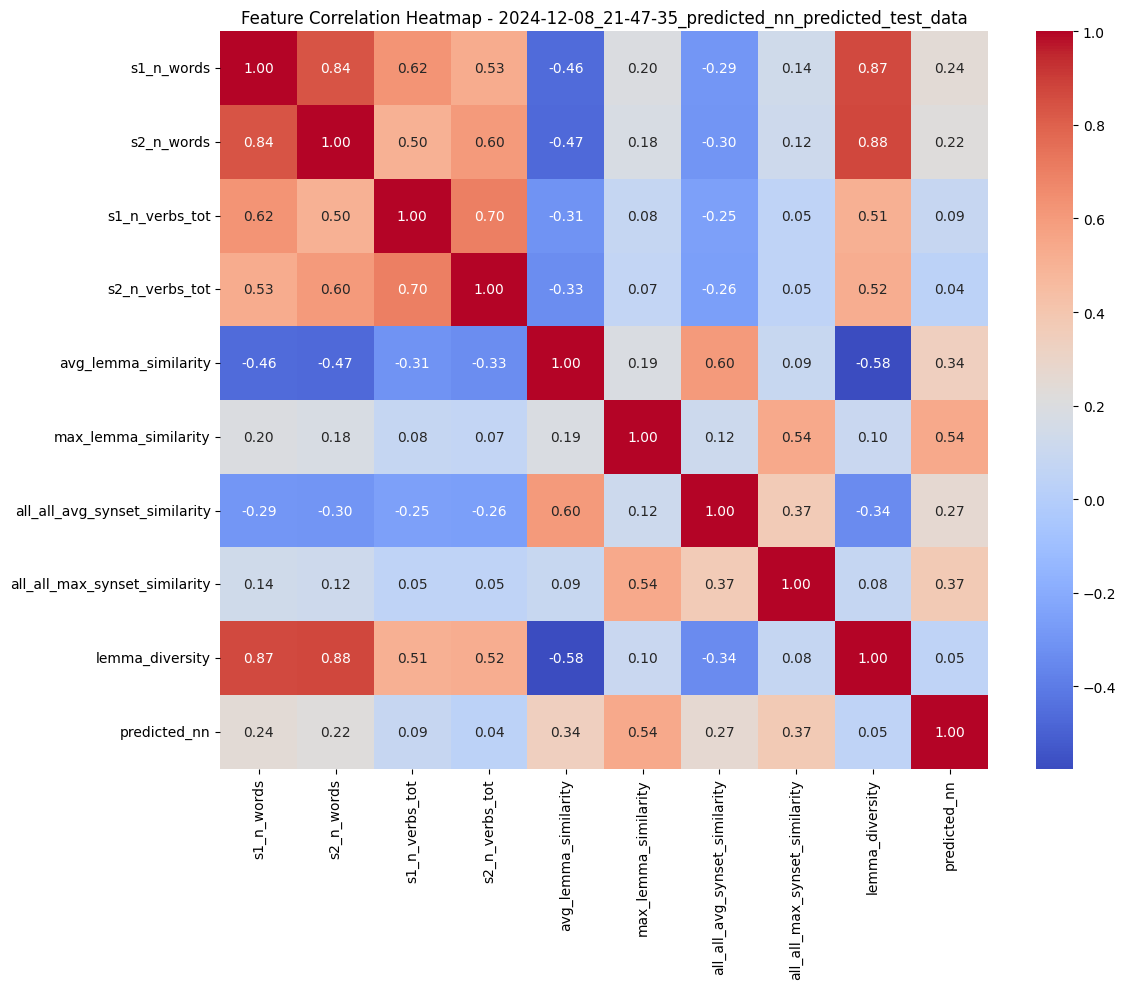

Generating correlation heatmap for Model: 2024-12-08_21-54-08_predicted_mlp_predicted_test_data


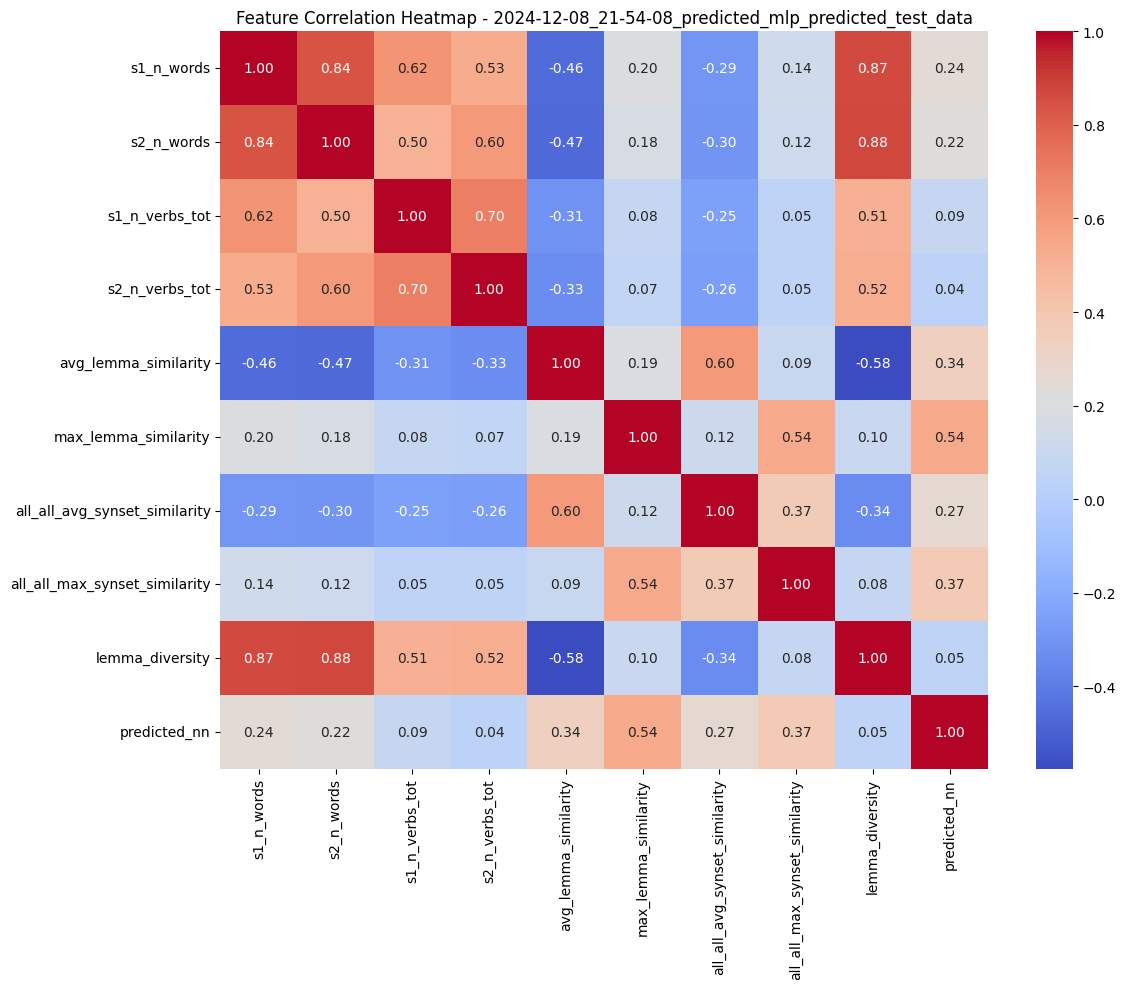

In [5]:
def plot_correlation_heatmaps(model_dfs, columns=None):
    """
    Plot heatmaps of correlations for each model.
    """
    for model_name, df in model_dfs.items():
        print(f"Generating correlation heatmap for Model: {model_name}")
        plt.figure(figsize=(12, 10))
        if columns is None:
            columns = df.select_dtypes(include=['float64', 'int64']).columns
        correlation_matrix = df[columns].corr()
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
        plt.title(f"Feature Correlation Heatmap - {model_name}")
        plt.tight_layout()
        plt.show()

# TODO: Define all correct numerical features!!!
# Specify columns for heatmaps (adjust as needed)
numerical_features = [
    's1_n_words', 's2_n_words', 's1_n_verbs_tot', 's2_n_verbs_tot',
    'avg_lemma_similarity', 'max_lemma_similarity',
    'all_all_avg_synset_similarity', 'all_all_max_synset_similarity',
    'lemma_diversity', 'predicted_nn'
]

plot_correlation_heatmaps(model_dfs, numerical_features)

Generating distribution plots for Model: 2024-12-08_21-47-35_predicted_nn_predicted_test_data


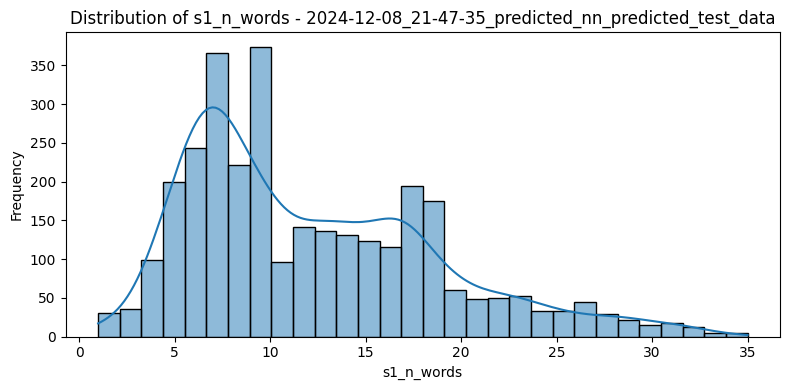

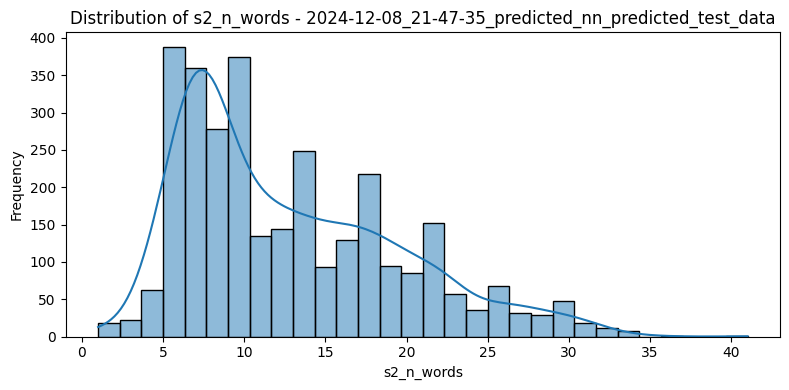

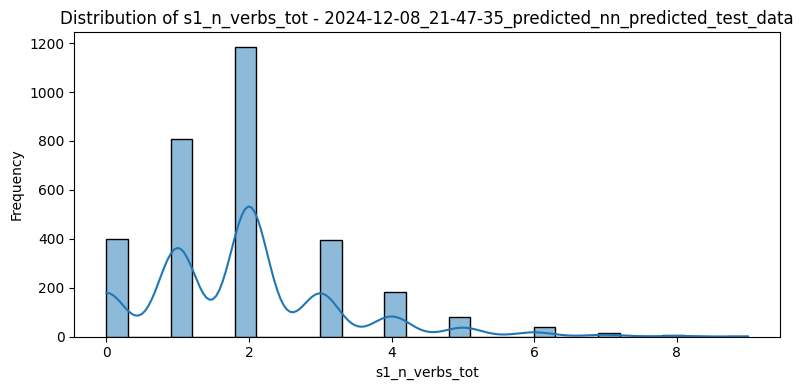

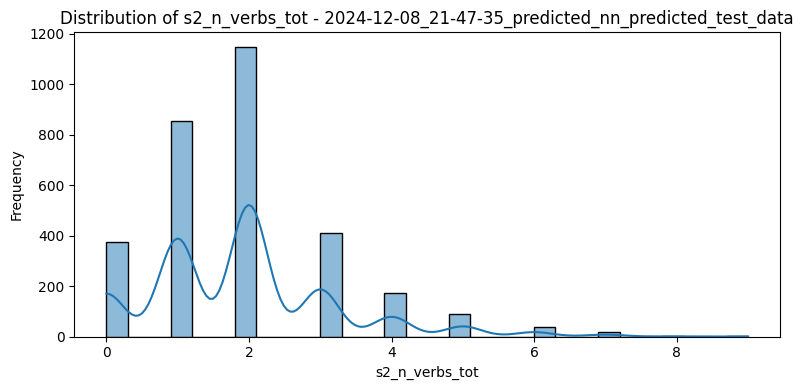

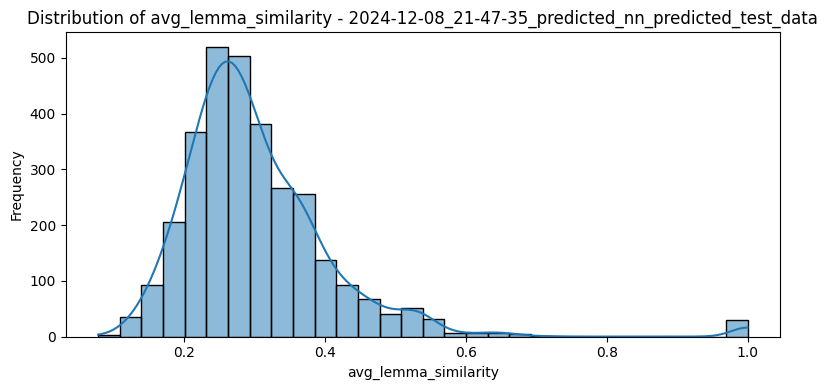

Generating distribution plots for Model: 2024-12-08_21-54-08_predicted_mlp_predicted_test_data


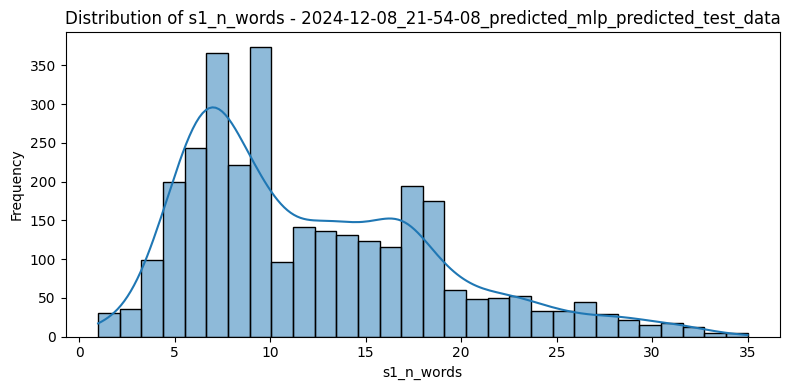

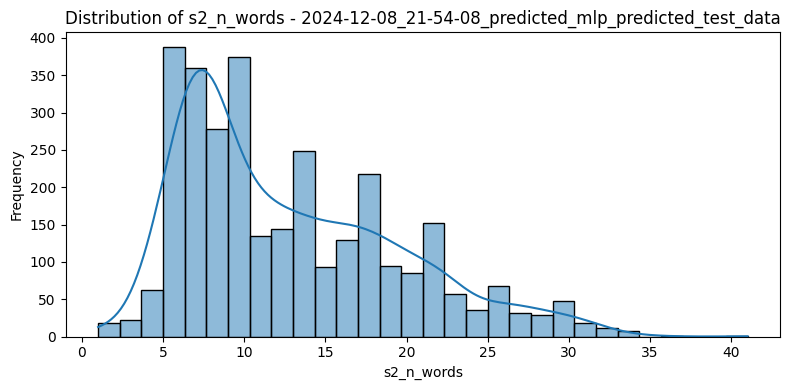

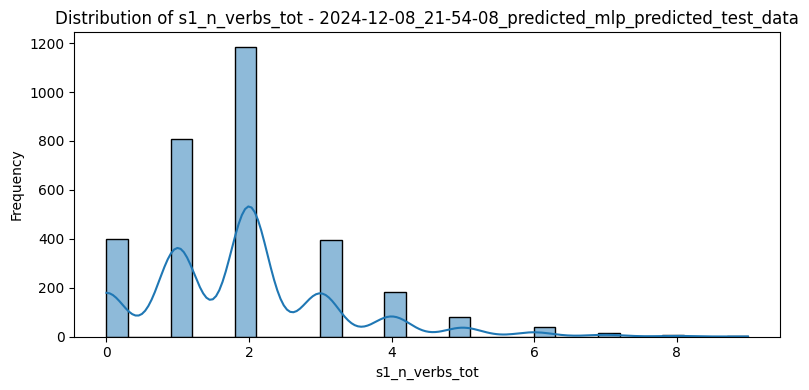

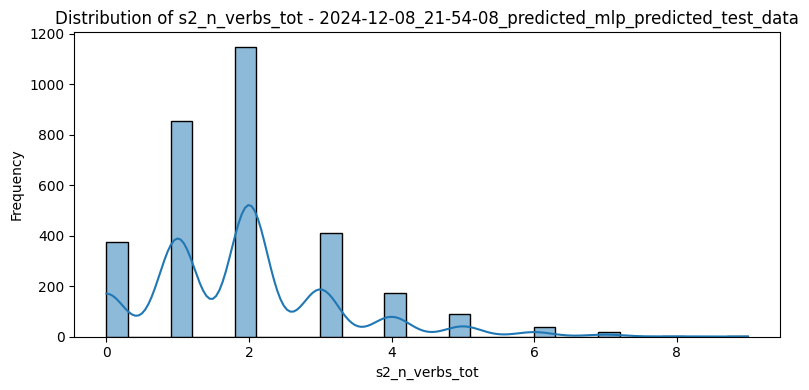

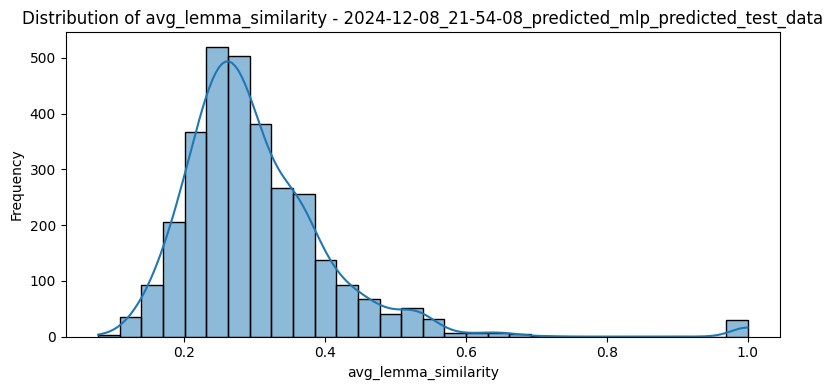

In [ ]:
def plot_distributions_for_models(model_dfs, columns):
    """
    Plot distribution plots for selected columns for each model.
    """
    for model_name, df in model_dfs.items():
        print(f"Generating distribution plots for Model: {model_name}")
        for column in columns:
            plt.figure(figsize=(8, 4))
            sns.histplot(df[column], kde=True, bins=30)
            plt.title(f"Distribution of {column} - {model_name}")
            plt.xlabel(column)
            plt.ylabel("Frequency")
            plt.tight_layout()
            plt.show()

# TODO: Decide which ones to display [if any?] 
# Plot distributions for the first 5 numerical features
plot_distributions_for_models(model_dfs, numerical_features[:5])